adapted from https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture2-supervised-learning.ipynb

# Supervised Learning Dataset

A dataset for supervised learning consists of a set of  $n$ examples (e.g., $n$ rows or records)
Training data = $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$

Here $x^{(i)}$ denotes the input features for example  $i$, and each $y^{(i)} \in \mathcal{Y}$ is the corresponding target

Therefore, $(x^{(i)}, y^{(i)})$ is the $i$'th *training example*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets



## Load the diabetes dataset

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)




.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# print the list of input features


In [3]:

diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


# Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1, 
x^{(i)}_2,
\ldots, x^{(i)}_d
\end{bmatrix}^T$$
For example, it could be the measurements the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. 

In [4]:
# Let see the feature space for patient i = 0 and i = 10 (note that these are pre-normalized to have mean 0, sd = 1)

for i in [0,10]:
    print(f"patient {i}: \n features: {diabetes_X.iloc[i]}\n\n")


patient 0: 
 features: age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019907
s6    -0.017646
Name: 0, dtype: float64


patient 10: 
 features: age   -0.096328
sex   -0.044642
bmi   -0.083808
bp     0.008101
s1    -0.103389
s2    -0.090561
s3    -0.013948
s4    -0.076395
s5    -0.062917
s6    -0.034215
Name: 10, dtype: float64




# Features: Discrete vs. Continuous 

Features can be either discrete or continuous (discrete features take values in a finite set, e.g. gender)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

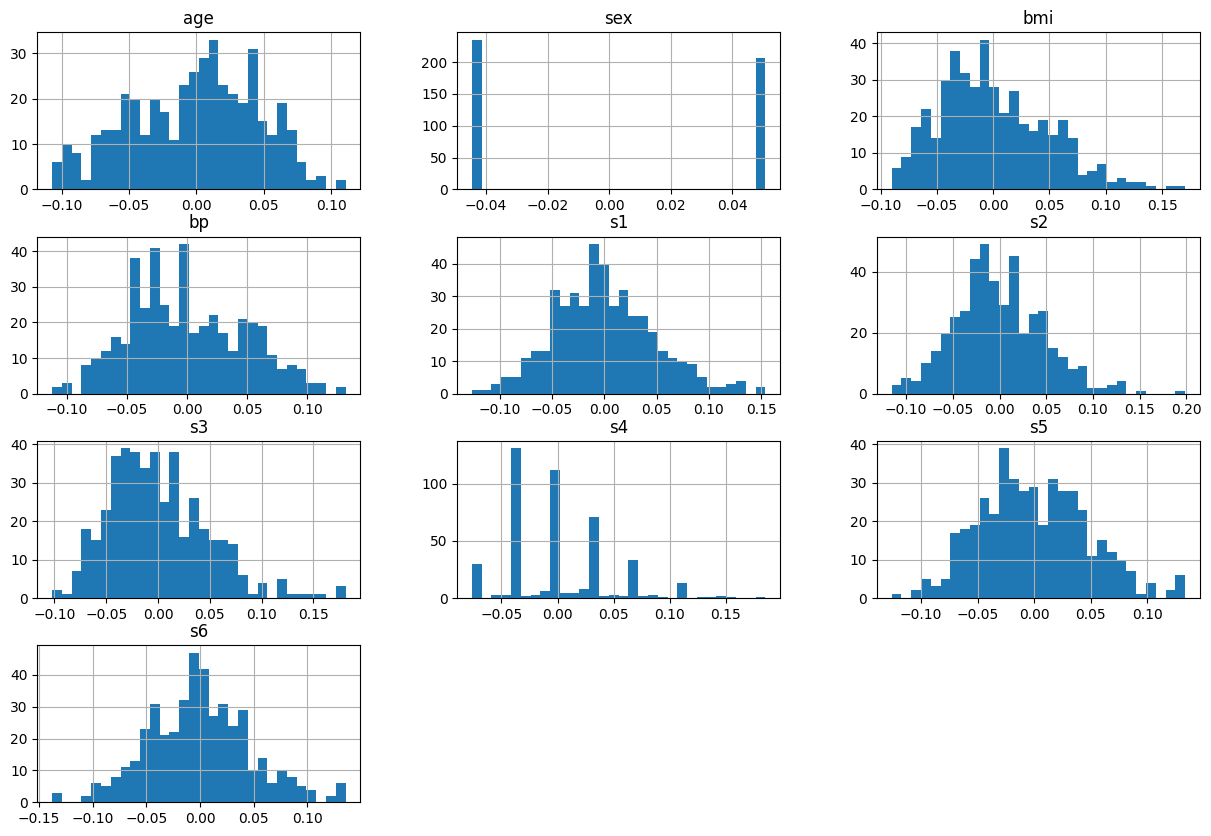

In [5]:
diabetes_X.hist(bins=30, figsize=(15, 10))

# Training Dataset: Creating derived features

We can transform the existing attributescreate new derived features based on 

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these derived attributes *features*.

In [6]:
diabetes_X['senior female'] = (diabetes_X['sex'] < 0) & (diabetes_X['age'] > 0.05)
diabetes_X['obese senior male'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05) & (diabetes_X['bmi'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,senior female,obese senior male
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,False,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,False,False
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,False,False
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,False,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,False,False


# Plotting the distribution of the target variable

<Axes: xlabel='Diabetes risk score', ylabel='Number of patients'>

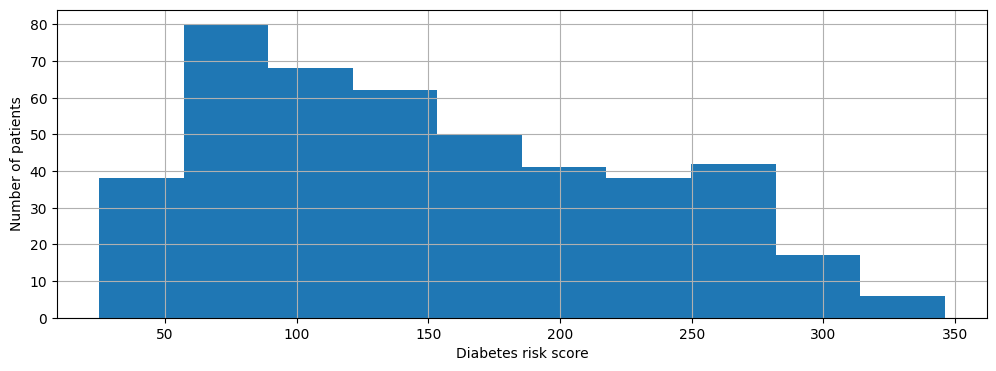

In [7]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

In [8]:
# Training and Test datasets


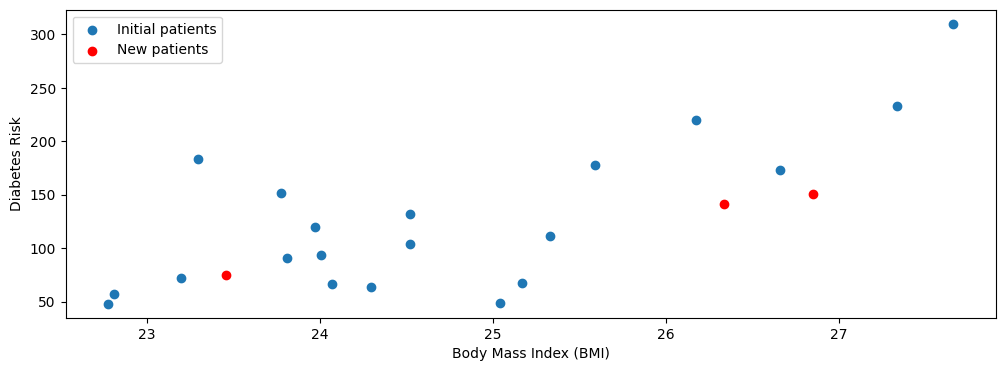

In [9]:
# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

# Targets: Regression vs. Classification

Supervised learning algorithms differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous and we are trying to predict its value  
2. __Classification__: The target variable $y$ is discrete. Each discrete value is a distinct *class* and we are trying to predict the class


Text(0.5, 1.0, 'High-Risk and Low_Risk patients (discretized) based on target)')

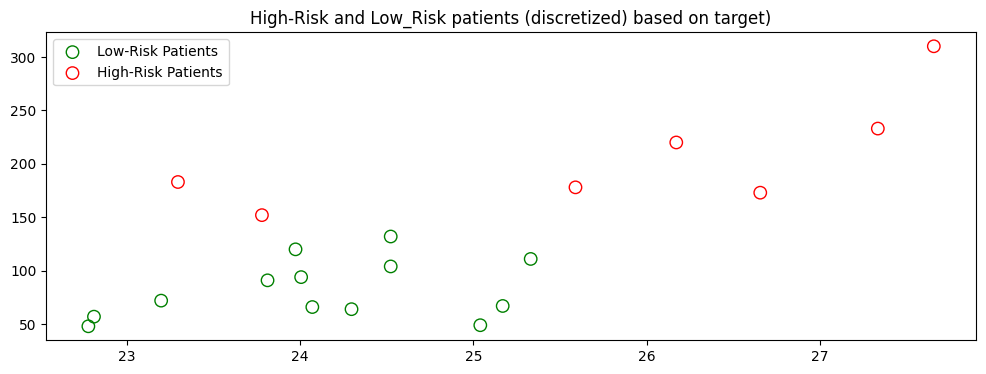

In [17]:
# Discretize the targets
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])
plt.title('High-Risk and Low_Risk patients (discretized) based on target)')


In [13]:
# fit a continous target using linear regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

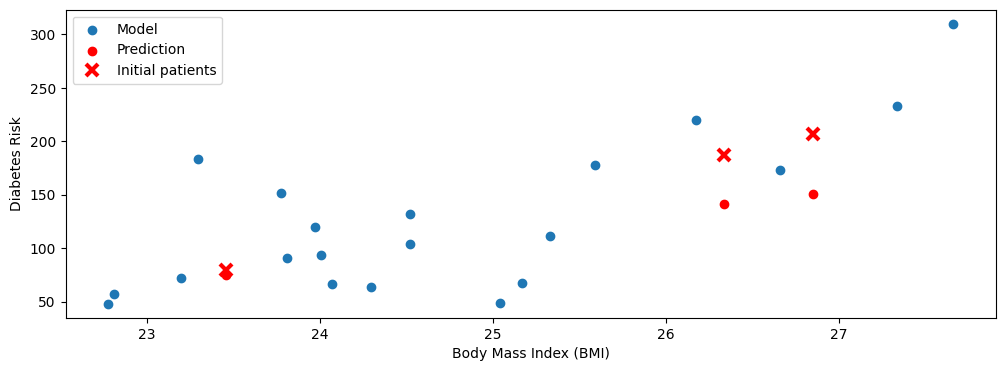

In [14]:
# visualize the results

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
# plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

In [18]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))


Training set mean squared error: 2176.00
Test set mean squared error: 1749.30
